In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
def parse_commision(commision):
    if commision.strip() == '':
        return float('nan')
    try:
        return re.match(r'\D*(\d+)\D*', commision).group(1)
    except:
        return float('nan')

In [3]:
def parse_number(value):
    try:
        return float(value)
    except:
        return float('NaN')

In [4]:
def parse_surface(char):
    char = char.replace('.', '')
    char = char.replace(',', '.')
    if 'mp' in char:
        try:
            return float(re.match(r'\D*(\d+\.?\d+)\s*mp.*', char).group(1))
        except:
            pass
    return float('NaN')

In [5]:
def parse_year(char):
    try:
        return int(re.match(r'\D*(\d+)\D*', char).group(1))
    except:
        return float('nan')

In [6]:
def parse_floor(char):
    if 'parter' in char.lower():
        floor = 0
    elif 'etaj' in char.lower():
        try:
            return int(re.match(r'.*etaj\s*(\d+)', char.lower()).group(1))
        except:
            return float('nan')

In [7]:
data = []
with open('dataset.txt', 'rt') as fin:
    for line in fin:
        d = json.loads(line)
        if 'An construcţie:' in d:
            d['An construcţie:'] = parse_year(d['An construcţie:'])
        if 'Etaj:' in d:
            d['Etaj:'] = parse_floor(d['Etaj:'])
        if 'Suprafaţă construită:' in d:
            d['Suprafaţă construită:'] = parse_surface(d['Suprafaţă construită:'])
        if 'Suprafaţă utilă totală:' in d:
            d['Suprafaţă utilă totală:'] = parse_surface(d['Suprafaţă utilă totală:'])
        if 'Suprafaţă utilă:' in d:
            d['Suprafaţă utilă:'] = parse_surface(d['Suprafaţă utilă:'])
        del d['currency']
        data.append(d)

In [8]:
df = pd.DataFrame.from_records(data)
df

,An construcţie:,Compartimentare:,Confort:,Etaj:,Nr. balcoane:,Nr. bucătării:,Nr. băi:,Nr. camere:,Nr. garaje:,Nr. locuri parcare:,Regim înălţime:,Structură rezistenţă:,Suprafaţă construită:,Suprafaţă utilă totală:,Suprafaţă utilă:,Tip imobil:,comission_v,price
0,2019.0,decomandat,lux,2.0,2,1,2,3,1,56,S+P+4E,beton,101.17,8663.0,86.63,bloc de apartamente,Comision 0%,100.999
1,2019.0,decomandat,lux,4.0,NaN,1,4,5,NaN,NaN,P+11E,beton,289.00,NaN,200.00,bloc de apartamente,Comision 0%,100.999
2,2019.0,decomandat,lux,NaN,2,1,2,3,1,56,S+P+4E,beton,129.96,11197.0,111.97,bloc de apartamente,Comision 0%,100.999
3,2016.0,decomandat,lux,12.0,1,1,2,3,1,1,S+P+13E,beton,135.00,126.0,126.00,bloc de apartamente,Comision 0%,100.999
4,2019.0,nedecomandat,lux,1.0,1,1,2,3,NaN,NaN,P+4E,beton,81.00,63.0,60.00,bloc de apartamente,Comision 0%,100.999
5,2018.0,decomandat,lux,2.0,1,1,1,2,NaN,1,S+P+6E,beton,62.00,48.0,48.00,bloc de apartamente,Comision 0%,100.999
6,2018.0,semidecomandat,lux,2.0,1,1,1,2,NaN,NaN,P+11E,beton,96.40,NaN,65.42,bloc de apartamente,Comision 0%,100.999
7,2019.0,decomandat,1,1.0,1,1,2,2,NaN,NaN,S+P+11E,beton,70.34,5807.0,52.61,bloc de apartamente,Comision 0%,100.999
8,2019.0,decomandat,lux,1.0,1,1,2,3,1,2,S+P+5E,beton,119.00,100.0,91.00,bloc de apartamente,Comision 0%,100.999
9,2019.0,semidecomandat,1,1.0,1,1,2,3,NaN,NaN,S+P+11E,beton,92.38,7775.0,71.85,bloc de apartamente,Comision 0%,100.999


In [9]:
df.columns = [
    'year', 'compartimentalization', 'comfort', 'floor', 'balconies', 'kitchens',
    'bathrooms', 'rooms', 'garages', 'parking spots', 'height regime',
    'structure', 'built surface', 'total useful surface', 'useful surface',
    'type', 'commission', 'price'
]

In [10]:
df

,year,compartimentalization,comfort,floor,balconies,kitchens,bathrooms,rooms,garages,parking spots,height regime,structure,built surface,total useful surface,useful surface,type,commission,price
0,2019.0,decomandat,lux,2.0,2,1,2,3,1,56,S+P+4E,beton,101.17,8663.0,86.63,bloc de apartamente,Comision 0%,100.999
1,2019.0,decomandat,lux,4.0,NaN,1,4,5,NaN,NaN,P+11E,beton,289.00,NaN,200.00,bloc de apartamente,Comision 0%,100.999
2,2019.0,decomandat,lux,NaN,2,1,2,3,1,56,S+P+4E,beton,129.96,11197.0,111.97,bloc de apartamente,Comision 0%,100.999
3,2016.0,decomandat,lux,12.0,1,1,2,3,1,1,S+P+13E,beton,135.00,126.0,126.00,bloc de apartamente,Comision 0%,100.999
4,2019.0,nedecomandat,lux,1.0,1,1,2,3,NaN,NaN,P+4E,beton,81.00,63.0,60.00,bloc de apartamente,Comision 0%,100.999
5,2018.0,decomandat,lux,2.0,1,1,1,2,NaN,1,S+P+6E,beton,62.00,48.0,48.00,bloc de apartamente,Comision 0%,100.999
6,2018.0,semidecomandat,lux,2.0,1,1,1,2,NaN,NaN,P+11E,beton,96.40,NaN,65.42,bloc de apartamente,Comision 0%,100.999
7,2019.0,decomandat,1,1.0,1,1,2,2,NaN,NaN,S+P+11E,beton,70.34,5807.0,52.61,bloc de apartamente,Comision 0%,100.999
8,2019.0,decomandat,lux,1.0,1,1,2,3,1,2,S+P+5E,beton,119.00,100.0,91.00,bloc de apartamente,Comision 0%,100.999
9,2019.0,semidecomandat,1,1.0,1,1,2,3,NaN,NaN,S+P+11E,beton,92.38,7775.0,71.85,bloc de apartamente,Comision 0%,100.999


In [11]:
df['year'] = df['year'].fillna(int(df['year'].mean()))

In [12]:
def map_compartimentalization(comp):
    try:
        return {
        'decomandat': 0,
        'semidecomandat': 1,
        'nedecomandat': 2,
        'circular': 3,
        'vagon': 4
        }[comp]
    except:
        return 5

In [13]:
df['compartimentalization'].value_counts()

decomandat        2959
semidecomandat     822
nedecomandat        27
circular            26
vagon                2
Name: compartimentalization, dtype: int64

In [14]:
df['compartimentalization'] = df['compartimentalization'].apply(map_compartimentalization)
df['compartimentalization'].value_counts()

0    2959
1     822
5      96
2      27
3      26
4       2
Name: compartimentalization, dtype: int64

In [15]:
df['comfort'].value_counts()

1      2804
lux     973
2        30
3         6
Name: comfort, dtype: int64

In [16]:
def map_comfort(comf):
    if comf == 'lux':
        return 4
    return float(comf)

In [17]:
df['comfort'] = df['comfort'].apply(map_comfort)
df['comfort'] = df['comfort'].fillna(int(df['comfort'].mean()))
df['comfort'].value_counts()

1.0    2923
4.0     973
2.0      30
3.0       6
Name: comfort, dtype: int64

In [18]:
df['floor'].value_counts()
df['floor'] = df['floor'].fillna(df['floor'].median())

In [19]:
def map_balconies(balc):
    if type(balc) is float:
        return balc
    if 'închise' not in balc:
        return float(balc)
    else:
        return -int(re.match(r'.*(\d+).*închise', balc).group(1))

In [20]:
df['balconies'] = df['balconies'].apply(map_balconies)
df['balconies'] = df['balconies'].fillna(df['balconies'].median())
df['balconies'].value_counts()

 1.0     3112
 2.0      393
-1.0      296
 3.0       59
-2.0       44
 4.0       15
-3.0        7
 5.0        3
 12.0       1
 6.0        1
 11.0       1
Name: balconies, dtype: int64

In [21]:
df['kitchens'].value_counts()

1    3509
2      17
6       1
4       1
Name: kitchens, dtype: int64

In [22]:
df['kitchens'] = df['kitchens'].fillna(1)

In [23]:
df['bathrooms'].value_counts()

1     2248
2     1374
3      161
4       39
5        8
6        1
13       1
Name: bathrooms, dtype: int64

In [24]:
df['bathrooms'] = df['bathrooms'].fillna(1)

In [25]:
df['rooms'].value_counts()

2     1629
3     1383
1      443
4      367
5       73
6       11
7        8
10       2
12       1
34       1
17       1
Name: rooms, dtype: int64

In [26]:
df['rooms'] = df['rooms'].fillna(2)

In [27]:
df['garages'] = df['garages'].fillna(0)

In [28]:
df['garages'].value_counts()

0     3689
1      217
2       21
3        3
34       1
30       1
Name: garages, dtype: int64

In [29]:
df['parking spots'].value_counts()

1     850
2      90
3      12
56      7
37      4
28      4
40      3
4       2
34      1
7       1
38      1
50      1
99      1
Name: parking spots, dtype: int64

In [30]:
df['parking spots'] = df['parking spots'].fillna(0)

In [31]:
df['structure'].value_counts()

beton       3055
caramida     184
altele       116
metal          1
bca            1
Name: structure, dtype: int64

In [32]:
def map_structure(structure):
    try:
        return {
            'caramida': 1,
            'altele': 0,
            'metal': 2,
            'bca': 3,
            'beton': 4
        }[structure]
    except Exception as e:
        return float('nan')

In [33]:
df['structure'] = df['structure'].fillna('beton')
df['structure'] = df['structure'].apply(map_structure)
df['structure'].value_counts()

4    3630
1     184
0     116
3       1
2       1
Name: structure, dtype: int64

In [34]:
del df['height regime']

In [35]:
df['built surface'] = df['built surface'].fillna(df['built surface'].mean())
df['total useful surface'] = df['total useful surface'].fillna(df['total useful surface'].mean())
df['useful surface'] = df['useful surface'].fillna(df['useful surface'].mean())

In [36]:
def map_type(t):
    if t == 'bloc de apartamente':
        return 1
    elif t == 'casa/vila':
        return 2
    else:
        return 0

In [37]:
df['type'].value_counts()

bloc de apartamente    3821
casa/vila                89
Name: type, dtype: int64

In [38]:
df['type'] = df['type'].apply(map_type)

In [39]:
del df['commission']

In [40]:
def parse_price(price):
    price = price.replace('.', '')
    price = price.replace(',', '')
    try:
        return float(price)
    except:
        return float('nan')

In [41]:
df['price'] = df['price'].apply(parse_price)

In [42]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

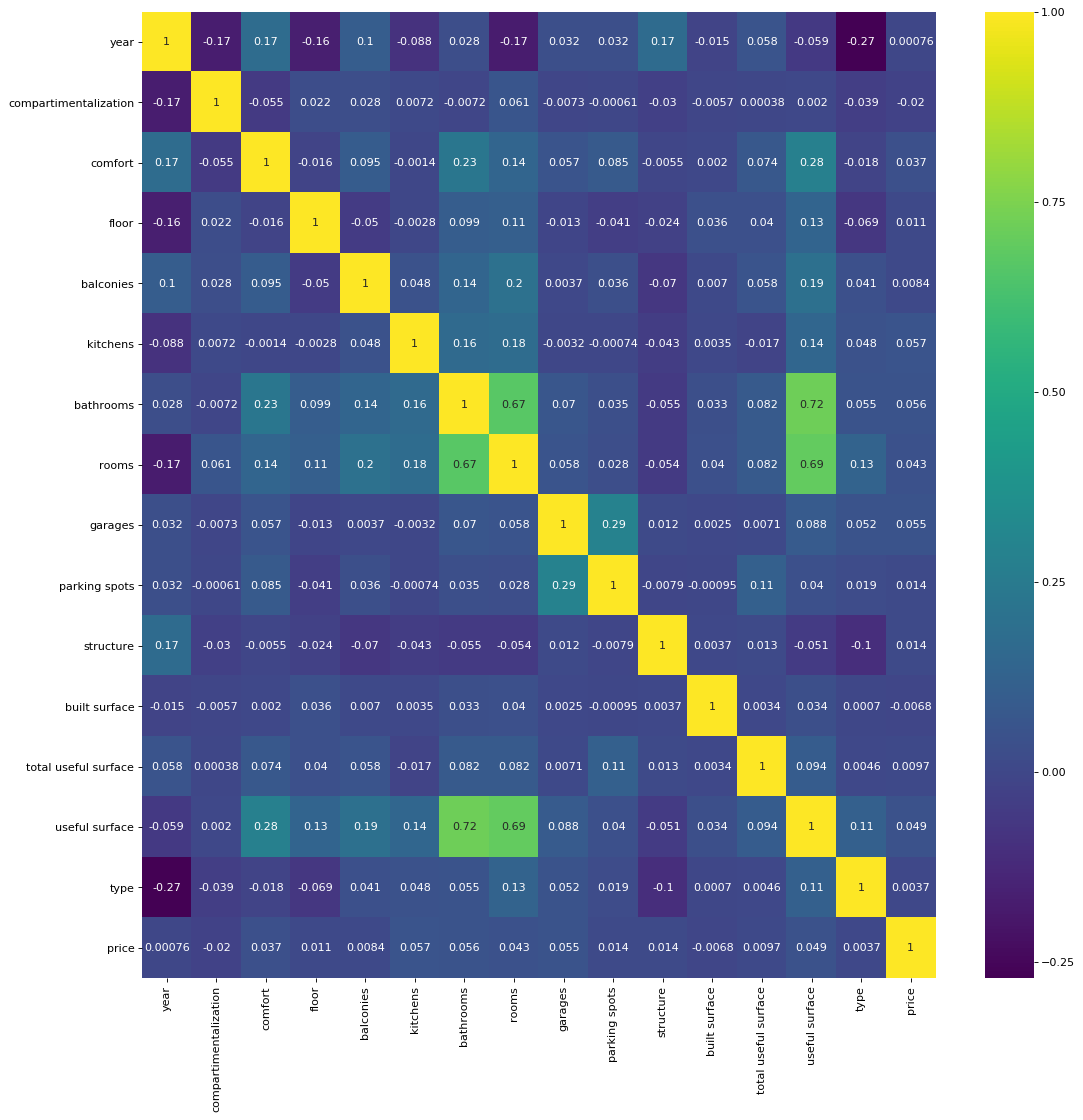

In [43]:
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), cmap=plt.cm.viridis, annot=True)
plt.show()

In [48]:
independent_variables = ['year', 'compartimentalization', 'comfort', 'floor', 'balconies',
       'kitchens', 'bathrooms', 'rooms', 'garages', 'parking spots',
       'structure', 'built surface', 'total useful surface', 'useful surface',
       'type']

In [49]:
X = np.array(df[independent_variables])
y = np.array(df['price'])
models = []

kfold = KFold(n_splits=5)

for split, (train_indices, test_indices) in enumerate(kfold.split(range(X.shape[0]))):
    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]
    
    model = LinearRegression(normalize=True)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    score = np.sqrt(mean_squared_error(test_y, y_pred))  # RMSE
    models.append(model)
    print('[Split %d] Score: %f' % (split, score))

[Split 0] Score: 225823.254030
[Split 1] Score: 112433.833873
[Split 2] Score: 142001.902792
[Split 3] Score: 67124.324451
[Split 4] Score: 53720.529857


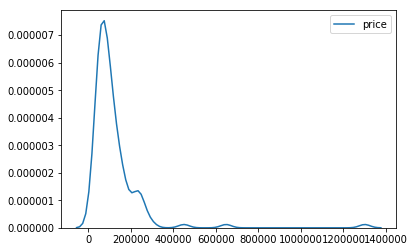

In [50]:
sns.kdeplot(df['price'])

In [51]:
df['price'].describe()

count    3.932000e+03
mean     1.192502e+05
std      1.326001e+05
min      2.090000e+04
25%      5.850000e+04
50%      8.950000e+04
75%      1.327690e+05
max      1.300000e+06
Name: price, dtype: float64

In [54]:
X = np.array(df.loc[df['price'] < 200000][independent_variables])
y = np.array(df.loc[df['price'] < 200000]['price'])
models = []

kfold = KFold(n_splits=5)

for split, (train_indices, test_indices) in enumerate(kfold.split(range(X.shape[0]))):
    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]
    
    model = LinearRegression(normalize=True)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    score = np.sqrt(mean_squared_error(test_y, y_pred))  # RMSE
    models.append(model)
    print('[Split %d] Score: %f' % (split, score))

[Split 0] Score: 46695.434547
[Split 1] Score: 39998.827566
[Split 2] Score: 44348.386800
[Split 3] Score: 37182.080363
[Split 4] Score: 40597.602903


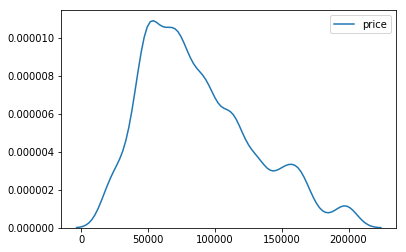

In [56]:
sns.kdeplot(df.loc[df['price'] < 200000]['price'])

In [57]:
X = np.array(df.loc[df['price'] > 50000][df['price'] < 150000][independent_variables])
y = np.array(df.loc[df['price'] > 50000][df['price'] < 150000]['price'])
models = []

kfold = KFold(n_splits=5)

for split, (train_indices, test_indices) in enumerate(kfold.split(range(X.shape[0]))):
    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]
    
    model = LinearRegression(normalize=True)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    score = np.sqrt(mean_squared_error(test_y, y_pred))  # RMSE
    models.append(model)
    print('[Split %d] Score: %f' % (split, score))

[Split 0] Score: 27919.401809
[Split 1] Score: 28783.404397
[Split 2] Score: 28284.696916
[Split 3] Score: 23223.904921
[Split 4] Score: 25806.748472


/home/rbotarleanu/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/rbotarleanu/.conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [58]:
model = LinearRegression(normalize=True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
model.coef_, model.intercept_

(array([-4.73657217e+01, -9.38376252e+02,  1.72683324e+02,  1.84991010e+02,
        -1.93972664e+03, -1.72985975e+03,  2.44284896e+03,  1.86542910e+03,
         5.57388535e+02, -6.28428174e+01, -1.05543053e+03, -3.63180903e-01,
         4.52673924e-01, -5.24362870e+01, -5.12716921e+03]), 191281.3732054841)

In [60]:
np.sqrt(mean_squared_error(model.predict(X), y))

26384.354139916086